### 4. Seaborn 패키지

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [31]:
mpg = sns.load_dataset('mpg')            # mile per gallon 데이터
iris = sns.load_dataset("iris")          # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")          # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

- 1차원 분포

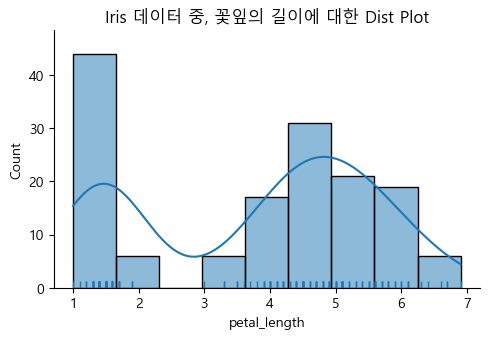

In [32]:
# distplot(distribution plot : 분포)
fig = sns.displot(x='petal_length', data = iris,kde=True, rug=True)
fig.fig.set_size_inches(5,3)
plt.title('Iris 데이터 중, 꽃잎의 길이에 대한 Dist Plot')
plt.show()
# sns로 작업했지만 plt로 출력한다.

- 카운트 플롯

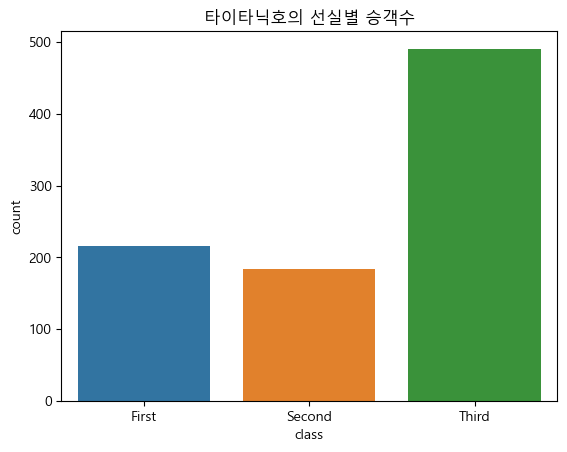

In [33]:
sns.countplot(x='class', data=titanic)
plt.title('타이타닉호의 선실별 승객수')
plt.show()

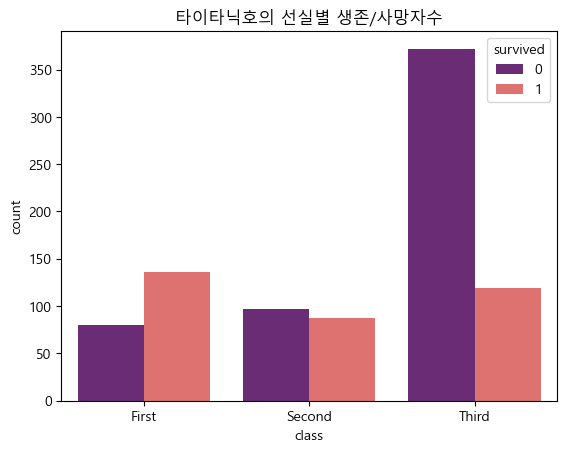

In [34]:
sns.countplot(x='class', hue='survived', data=titanic, palette='magma')
plt.title('타이타닉호의 선실별 생존/사망자수')
plt.show()

- 다차원 실수 데이터

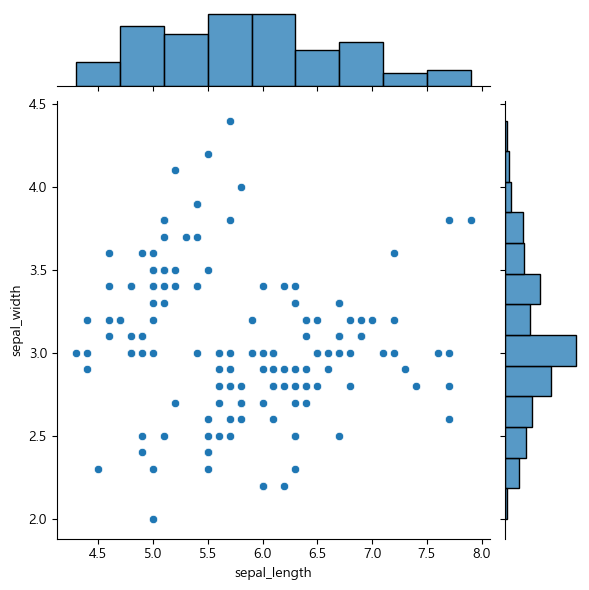

In [35]:
# joint plot
sns.jointplot(x='sepal_length', y='sepal_width', data=iris)
plt.show()

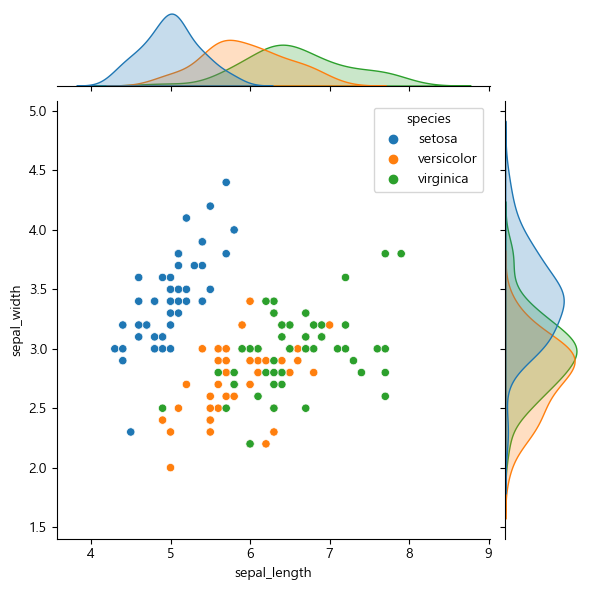

In [36]:
sns.jointplot(x='sepal_length', y='sepal_width', hue='species',data=iris)
plt.show()

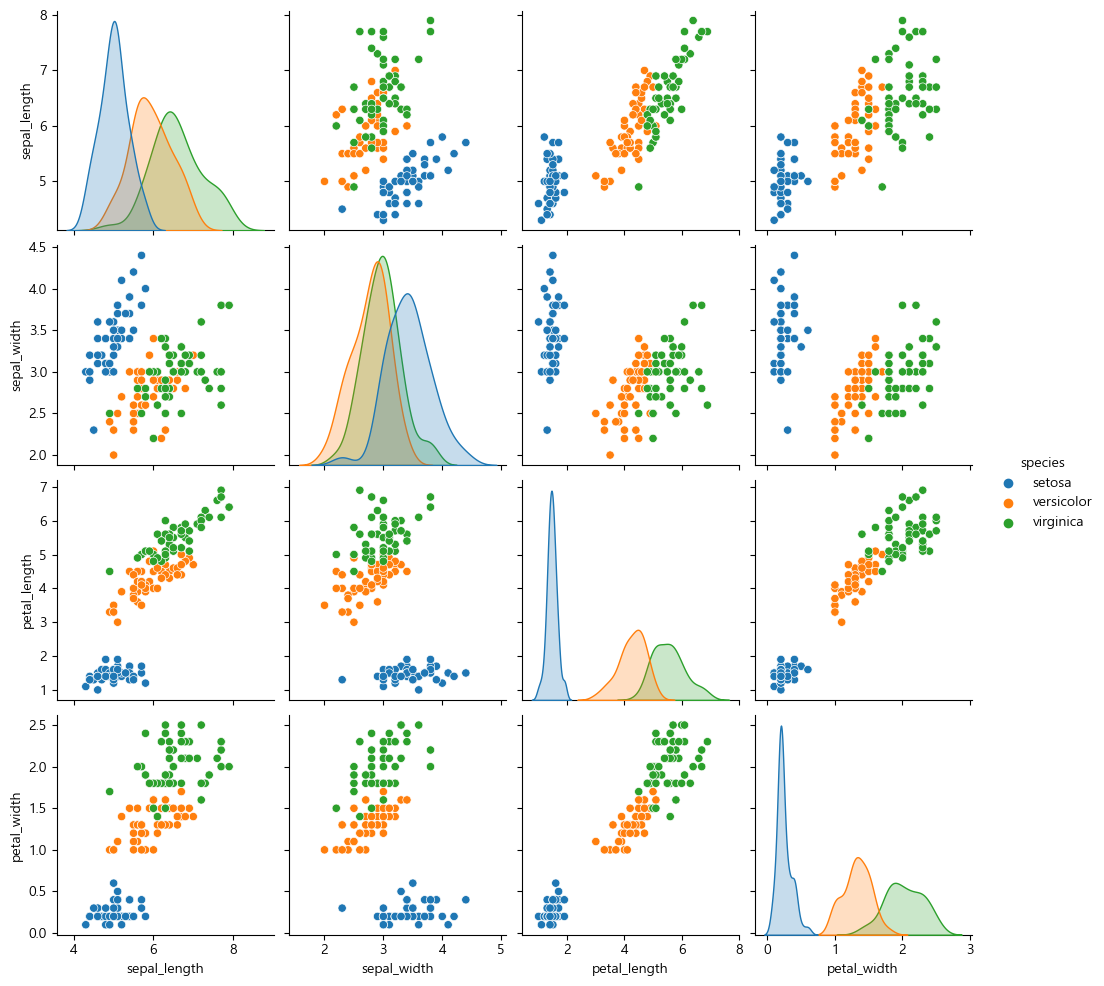

In [37]:
# pair plot
sns.pairplot(hue='species', data=iris);


-다차원 카테고리 데이터

In [38]:
# heatmap
dt = titanic.pivot_table('survived','class','sex','count')
dt

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


Text(0.5, 1.0, '타이타닉호의 선실별 성비')

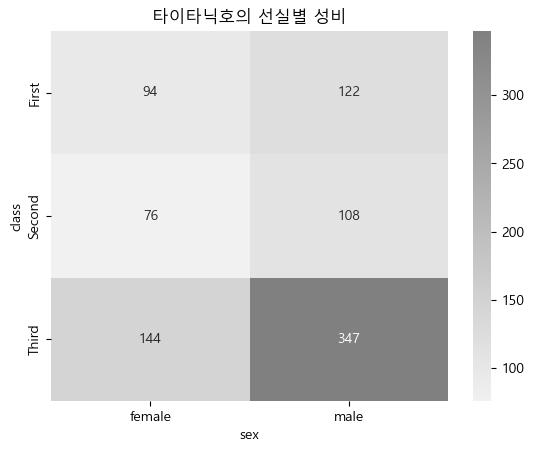

In [39]:
sns.heatmap(dt, cmap=sns.light_palette(
    "gray", as_cmap=True), annot=True, fmt="d")
plt.title('타이타닉호의 선실별 성비')

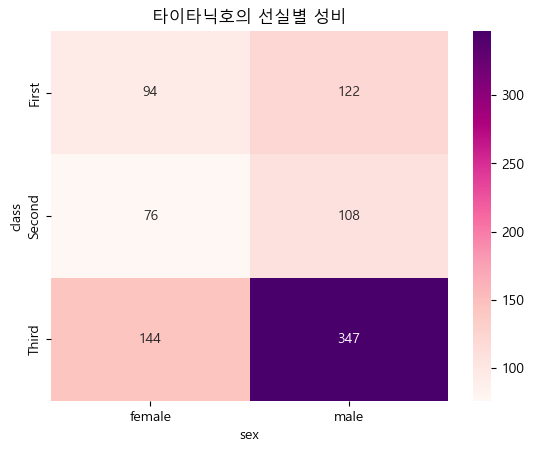

In [40]:
# cmap으로 다양한 색상을 입힐 수 있다
sns.heatmap(dt, cmap='RdPu', annot=True, fmt="d")
plt.title('타이타닉호의 선실별 성비');

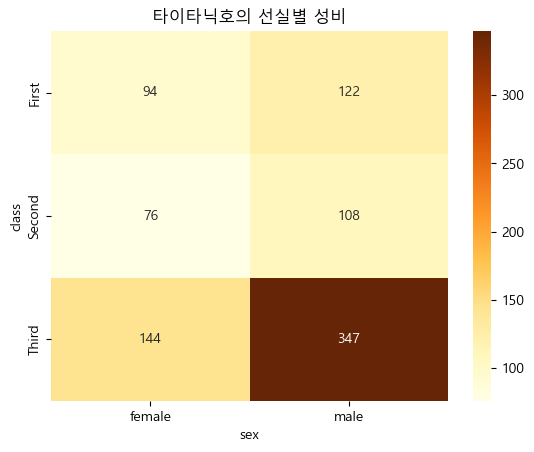

In [41]:
sns.heatmap(dt, cmap='YlOrBr', annot=True, fmt="d")
plt.title('타이타닉호의 선실별 성비');

In [42]:
print(flights.shape)
flights.head()

(144, 3)


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


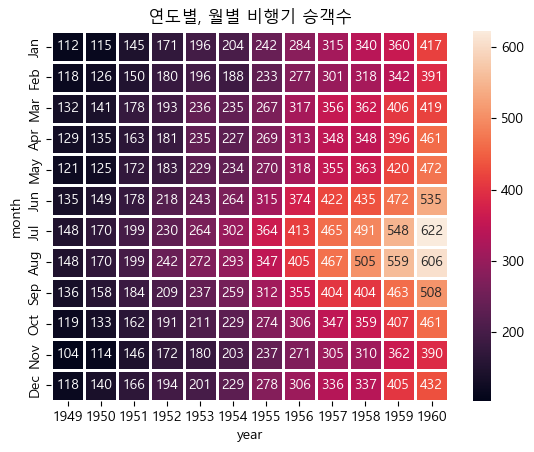

In [44]:
passengers = flights.pivot(index='month',columns='year',values='passengers')
sns.heatmap(passengers, annot=True,fmt='d',linewidths=1)
plt.title('연도별, 월별 비행기 승객수');

- 다차원 복합 데이터

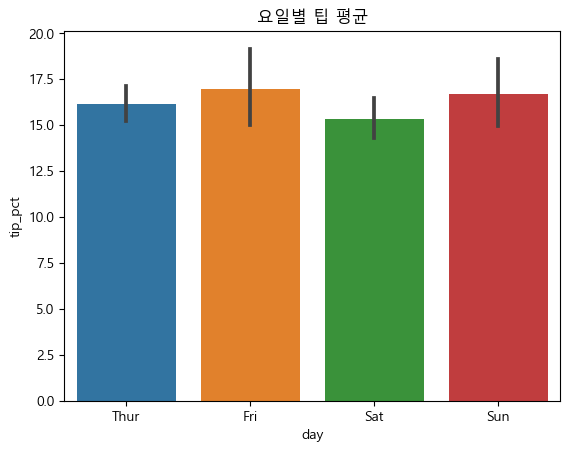

In [45]:
tips['tip_pct']=(tips.tip / tips.total_bill*100).round(2)
sns.barplot(x='day',y='tip_pct',data=tips)
plt.title('요일별 팁 평균');

- 제조사별 mpg 구하기

In [46]:
print(mpg.shape)
mpg.head()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [50]:
mpg['manufacturer']=mpg.name.apply(lambda x: x.split()[0])
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


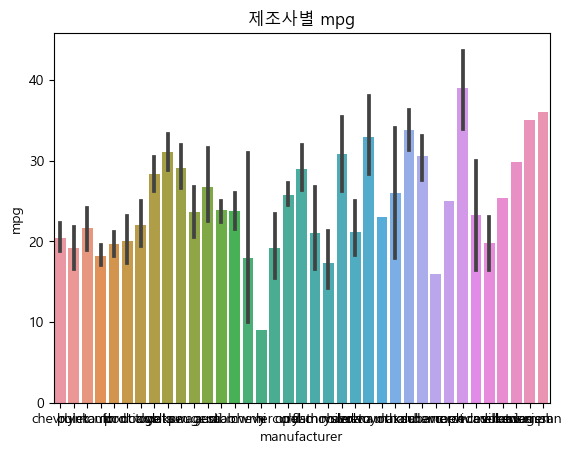

In [49]:
sns.barplot(x='manufacturer',y='mpg',data=mpg)
plt.title('제조사별 mpg');

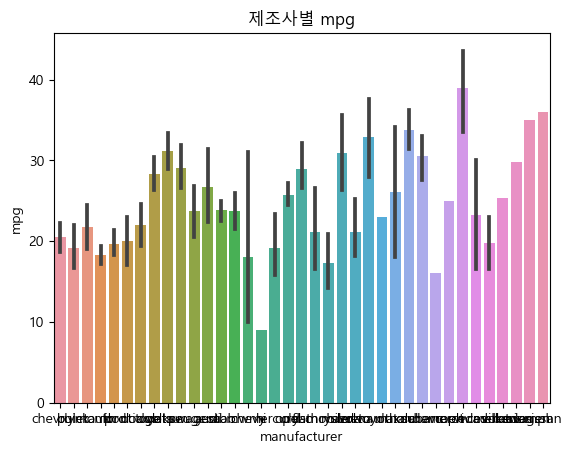

In [51]:
sns.barplot(y='mpg',x='manufacturer',data=mpg)
plt.title('제조사별 mpg');

- boxplot

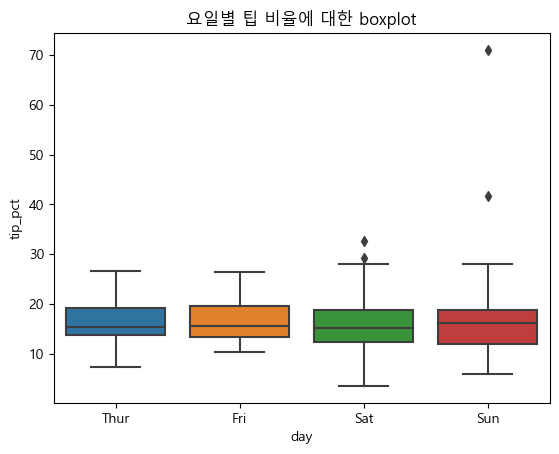

In [53]:
# 요일별 팁의 비율
sns.boxplot(x='day',y='tip_pct',data=tips)
plt.title('요일별 팁 비율에 대한 boxplot');

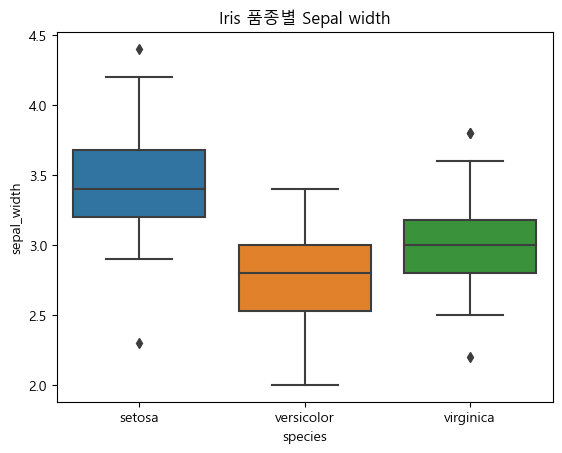

In [54]:
# iris
sns.boxplot(x='species',y='sepal_width',data=iris)
plt.title('Iris 품종별 Sepal width');

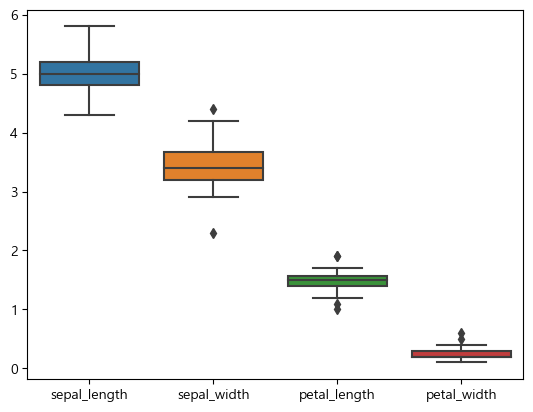

In [55]:
sns.boxplot(data=iris[iris.species == 'setosa']);

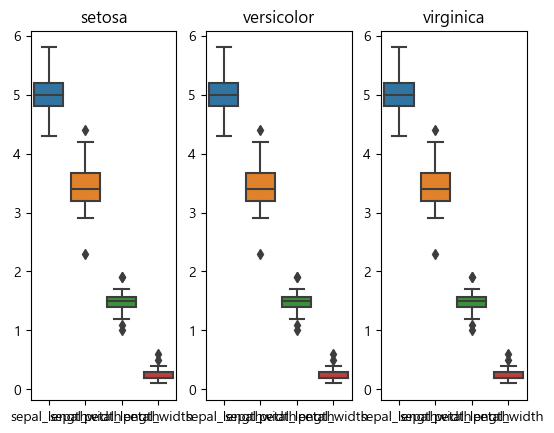

In [56]:
for i, species in enumerate(iris.species.unique()):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=iris[iris.species == 'setosa'])
    plt.title(species)
plt.show()

- regplot

In [57]:
ans = sns.load_dataset('anscombe')
ans.head(3)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58


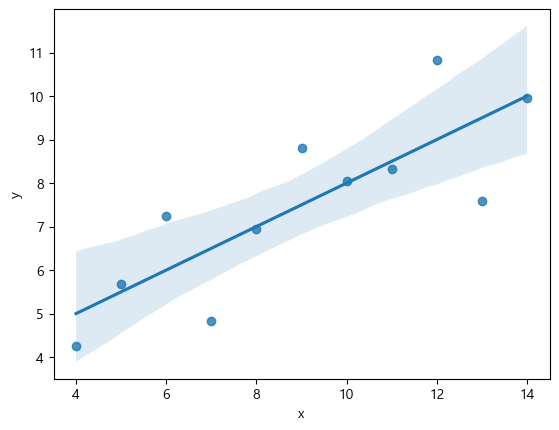

In [59]:
sns.regplot(x='x', y='y', data=ans[ans.dataset=='I']);

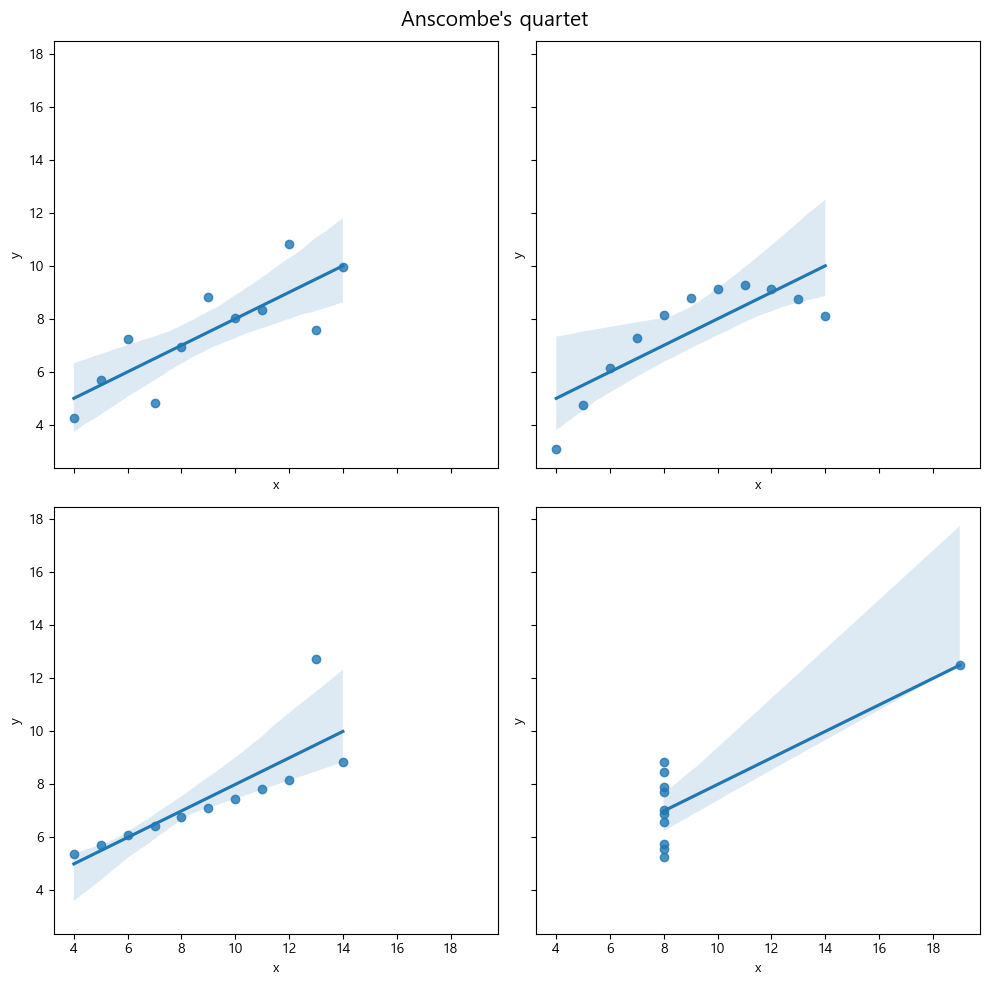

In [64]:
fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)
for i, roman in enumerate(ans.dataset.unique()):
    ax = axes[i//2,i%2]
    sns.regplot(x='x', y='y', data=ans[ans.dataset==roman],ax=ax)
fig.suptitle("Anscombe's quartet", fontsize=15)
plt.tight_layout()
plt.show()